In [1]:
# DIY-2: Employee Attrition and Satisfaction Analysis

## 1. Load Libraries and Dataset

## 2. Exploratory Data Analysis (EDA)

## 3. Data Preprocessing

## 4. Data Warehouse Features

## 5. Classification Models

## 6. Prediction Models

## 7. Management Reports (With Graphs)

## 8. Conclusion


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("HR Employee Attrition.csv")

# Show basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
education_map = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

df['EducationLevel'] = df['Education'].map(education_map)


In [7]:
df[['Education', 'EducationLevel']].head(10)


,Education,EducationLevel
0,2,College
1,1,Below College
2,2,College
3,4,Master
4,1,Below College
5,2,College
6,3,Bachelor
7,1,Below College
8,3,Bachelor
9,3,Bachelor


In [9]:

env_map = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

df['EnvironmentSatisfactionLevel'] = df['EnvironmentSatisfaction'].map(env_map)


In [17]:
job_inv= {
    1:'Low',
    2:'Medium',
    3:'High',
    4:'Very Hight'
}

df['JobInvolvementLevel'] = df['JobInvolvement'].map(job_inv)

In [18]:
job_sat= {
    1:'Low',
    2:'Medium',
    3:'High',
    4:'Very Hight'
}

df['JobSatisfactionLevel'] = df['JobSatisfaction'].map(job_sat)

In [20]:
perf_rate={
    1:'Low',
    2:'Good',
    3:'Excellent',
    4:'Outstanding',
}
df['PerformanceRatingLevel'] = df['PerformanceRating'].map(perf_rate) 

In [22]:
rel_sat={
     1:'Low',
    2:'Medium',
    3:'High',
    4:'Very High'
}

df['RelationshipSatisfactionLevel'] = df['RelationshipSatisfaction'].map(rel_sat)

In [24]:
workl_baln={
     1:'Bad',
    2:'Good',
    3:'Better',
    4:'Best'
}

df['WorkLifeBalanceLevel'] = df['WorkLifeBalance'].map(workl_baln)

In [26]:
mapped_columns = [
    'EducationLevel', 'EnvironmentSatisfactionLevel', 'JobInvolvementLevel',
    'JobSatisfactionLevel', 'PerformanceRatingLevel', 'RelationshipSatisfactionLevel',
    'WorkLifeBalanceLevel'
]

# Show a few rows of mapped columns
df[mapped_columns].head()


,EducationLevel,EnvironmentSatisfactionLevel,JobInvolvementLevel,JobSatisfactionLevel,PerformanceRatingLevel,RelationshipSatisfactionLevel,WorkLifeBalanceLevel
0,College,Medium,High,Very Hight,Excellent,Low,Bad
1,Below College,High,Medium,Medium,Outstanding,Very High,Better
2,College,Very High,Medium,High,Excellent,Medium,Better
3,Master,Very High,High,High,Excellent,High,Better
4,Below College,Low,High,Medium,Excellent,Very High,Better


In [27]:
from datetime import datetime

df['Date_Inserted'] = datetime.today().strftime('%Y-%m-%d')


In [29]:
df["Date_Inserted"].head()

0    2025-06-11
1    2025-06-11
2    2025-06-11
3    2025-06-11
4    2025-06-11
Name: Date_Inserted, dtype: object

In [30]:
df['Is_Active'] = df['Attrition'].apply(lambda x: 0 if x == 'Yes' else 1)


In [31]:
df['RecordID'] = df.index + 1


In [32]:
df[['RecordID', 'Attrition', 'Is_Active', 'Date_Inserted']].head()


,RecordID,Attrition,Is_Active,Date_Inserted
0,1,Yes,0,2025-06-11
1,2,No,1,2025-06-11
2,3,Yes,0,2025-06-11
3,4,No,1,2025-06-11
4,5,No,1,2025-06-11


In [33]:
# Info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            1470 non-null   int64 
 1   Attrition                      1470 non-null   object
 2   BusinessTravel                 1470 non-null   object
 3   DailyRate                      1470 non-null   int64 
 4   Department                     1470 non-null   object
 5   DistanceFromHome               1470 non-null   int64 
 6   Education                      1470 non-null   int64 
 7   EducationField                 1470 non-null   object
 8   EmployeeCount                  1470 non-null   int64 
 9   EmployeeNumber                 1470 non-null   int64 
 10  EnvironmentSatisfaction        1470 non-null   int64 
 11  Gender                         1470 non-null   object
 12  HourlyRate                     1470 non-null   int64 
 13  Job

In [34]:
df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Is_Active,RecordID
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.838776,735.500000
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.367863,424.496761
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,1.000000,368.250000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,1.000000,735.500000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,1.000000,1102.750000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000,1470.000000


In [35]:
object_cols = df.select_dtypes(include='object').columns
df[object_cols] = df[object_cols].astype('category')
df.dtypes


Age                                 int64
Attrition                        category
BusinessTravel                   category
DailyRate                           int64
Department                       category
DistanceFromHome                    int64
Education                           int64
EducationField                   category
EmployeeCount                       int64
EmployeeNumber                      int64
EnvironmentSatisfaction             int64
Gender                           category
HourlyRate                          int64
JobInvolvement                      int64
JobLevel                            int64
JobRole                          category
JobSatisfaction                     int64
MaritalStatus                    category
MonthlyIncome                       int64
MonthlyRate                         int64
NumCompaniesWorked                  int64
Over18                           category
OverTime                         category
PercentSalaryHike                 

In [37]:
# (Qi)Grouping by JobRole and EducationField
group_q1 = df.groupby(['JobRole', 'EducationField']).agg({
    'MonthlyIncome': 'sum',
    'JobSatisfaction': 'mean'
}).reset_index()

# Display result
group_q1


C:\Users\User\AppData\Local\Temp\ipykernel_24384\1209953706.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_q1 = df.groupby(['JobRole', 'EducationField']).agg({


,JobRole,EducationField,MonthlyIncome,JobSatisfaction
0,Healthcare Representative,Human Resources,0,NaN
1,Healthcare Representative,Life Sciences,427705,2.916667
2,Healthcare Representative,Marketing,0,NaN
3,Healthcare Representative,Medical,379054,2.541667
4,Healthcare Representative,Other,62407,2.888889
5,Healthcare Representative,Technical Degree,117102,3.000000
6,Human Resources,Human Resources,84574,2.428571
7,Human Resources,Life Sciences,57224,3.000000
8,Human Resources,Marketing,0,NaN
9,Human Resources,Medical,51086,2.272727


In [38]:
# Q(ii) - Gender-wise and JobRole-wise average satisfaction
group_q2 = df.groupby(['Gender', 'JobRole'])[['JobSatisfaction', 'EnvironmentSatisfaction']].mean().reset_index()

group_q2


C:\Users\User\AppData\Local\Temp\ipykernel_24384\1570440949.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_q2 = df.groupby(['Gender', 'JobRole'])[['JobSatisfaction', 'EnvironmentSatisfaction']].mean().reset_index()


,Gender,JobRole,JobSatisfaction,EnvironmentSatisfaction
0,Female,Healthcare Representative,2.843137,2.843137
1,Female,Human Resources,2.687500,2.750000
2,Female,Laboratory Technician,2.600000,2.741176
3,Female,Manager,2.638298,2.829787
4,Female,Manufacturing Director,2.597222,2.819444
5,Female,Research Director,2.575758,2.242424
6,Female,Research Scientist,2.631579,2.701754
7,Female,Sales Executive,2.734848,2.659091
8,Female,Sales Representative,2.947368,2.868421
9,Male,Healthcare Representative,2.750000,2.725000


In [39]:
# Q(iii) - EducationField & JobRole wise average HourlyRate, MonthlyIncome, JobSatisfaction
group_q3 = df.groupby(['EducationField', 'JobRole']).agg({
    'HourlyRate': 'mean',
    'MonthlyIncome': 'mean',
    'JobSatisfaction': 'mean'
}).reset_index()

group_q3


C:\Users\User\AppData\Local\Temp\ipykernel_24384\3843265916.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_q3 = df.groupby(['EducationField', 'JobRole']).agg({


,EducationField,JobRole,HourlyRate,MonthlyIncome,JobSatisfaction
0,Human Resources,Healthcare Representative,NaN,NaN,NaN
1,Human Resources,Human Resources,64.190476,4027.333333,2.428571
2,Human Resources,Laboratory Technician,NaN,NaN,NaN
3,Human Resources,Manager,49.333333,18489.500000,3.000000
4,Human Resources,Manufacturing Director,NaN,NaN,NaN
5,Human Resources,Research Director,NaN,NaN,NaN
6,Human Resources,Research Scientist,NaN,NaN,NaN
7,Human Resources,Sales Executive,NaN,NaN,NaN
8,Human Resources,Sales Representative,NaN,NaN,NaN
9,Life Sciences,Healthcare Representative,65.083333,7128.416667,2.916667


In [40]:
# Q(iv) - Department-wise and Gender-wise average JobSatisfaction
group_q4 = df.groupby(['Department', 'Gender'])['JobSatisfaction'].mean().reset_index()

group_q4


C:\Users\User\AppData\Local\Temp\ipykernel_24384\194816758.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_q4 = df.groupby(['Department', 'Gender'])['JobSatisfaction'].mean().reset_index()


,Department,Gender,JobSatisfaction
0,Human Resources,Female,2.750000
1,Human Resources,Male,2.534884
2,Research & Development,Female,2.633245
3,Research & Development,Male,2.786942
4,Sales,Female,2.777778
5,Sales,Male,2.731518


In [41]:
# Q(v) - Average DistanceFromHome by Gender, Department, and JobRole
group_q5 = df.groupby(['Gender', 'Department', 'JobRole'])['DistanceFromHome'].mean().reset_index()

group_q5


C:\Users\User\AppData\Local\Temp\ipykernel_24384\2108908899.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_q5 = df.groupby(['Gender', 'Department', 'JobRole'])['DistanceFromHome'].mean().reset_index()


,Gender,Department,JobRole,DistanceFromHome
0,Female,Human Resources,Healthcare Representative,NaN
1,Female,Human Resources,Human Resources,10.750000
2,Female,Human Resources,Laboratory Technician,NaN
3,Female,Human Resources,Manager,16.000000
4,Female,Human Resources,Manufacturing Director,NaN
5,Female,Human Resources,Research Director,NaN
6,Female,Human Resources,Research Scientist,NaN
7,Female,Human Resources,Sales Executive,NaN
8,Female,Human Resources,Sales Representative,NaN
9,Female,Research & Development,Healthcare Representative,9.529412


In [42]:
# Q(vi) - Average MonthlyIncome by Education and Attrition
group_q6 = df.groupby(['Education', 'Attrition'])['MonthlyIncome'].mean().reset_index()

group_q6


C:\Users\User\AppData\Local\Temp\ipykernel_24384\3487208347.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_q6 = df.groupby(['Education', 'Attrition'])['MonthlyIncome'].mean().reset_index()


,Education,Attrition,MonthlyIncome
0,1,No,5926.129496
1,1,Yes,4360.161290
2,2,No,6586.058824
3,2,Yes,4282.545455
4,3,No,6882.919662
5,3,Yes,4770.242424
6,4,No,7087.814706
7,4,Yes,5335.155172
8,5,No,8559.906977
9,5,Yes,5850.200000


In [44]:
#using Logistic Regression model for the prediction ..Convert Attrition to numeric (Yes=1, No=0)
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


In [45]:
#confirming attrition mapping
df['Attrition'].value_counts()


Attrition
0    1233
1     237
Name: count, dtype: int64

In [46]:
#Encoding all category variable
df_encoded = pd.get_dummies(df.drop(columns=['EmployeeNumber']), drop_first=True)


In [47]:
# Define input features (X) and target variable (y)
X = df_encoded.drop(columns=['Attrition', 'RecordID', 'Date_Inserted'])  # Drop columns not needed for prediction
y = df_encoded['Attrition']

KeyError: "['Attrition', 'Date_Inserted'] not found in axis"

In [48]:
df_encoded.columns.tolist()


['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Is_Active',
 'RecordID',
 'Attrition_1',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'Gender_Male',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Res

In [49]:
# Define X and y using corrected column names
X = df_encoded.drop(columns=['Attrition_1', 'RecordID'])
y = df_encoded['Attrition_1']


In [50]:
from sklearn.model_selection import train_test_split

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check the shape of the splits
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (1176, 67)
X_test: (294, 67)
y_train: (1176,)
y_test: (294,)


In [51]:
from sklearn.linear_model import LogisticRegression

# Create and train logistic regression model
log_model = LogisticRegression(max_iter=1000)  # Increased max_iter to ensure convergence
log_model.fit(X_train, y_train)


C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [52]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [53]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on test data
y_pred = log_model.predict(X_test_scaled)

# Accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 1.0
Confusion Matrix:
 [[247   0]
 [  0  47]]
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       247
        True       1.00      1.00      1.00        47

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



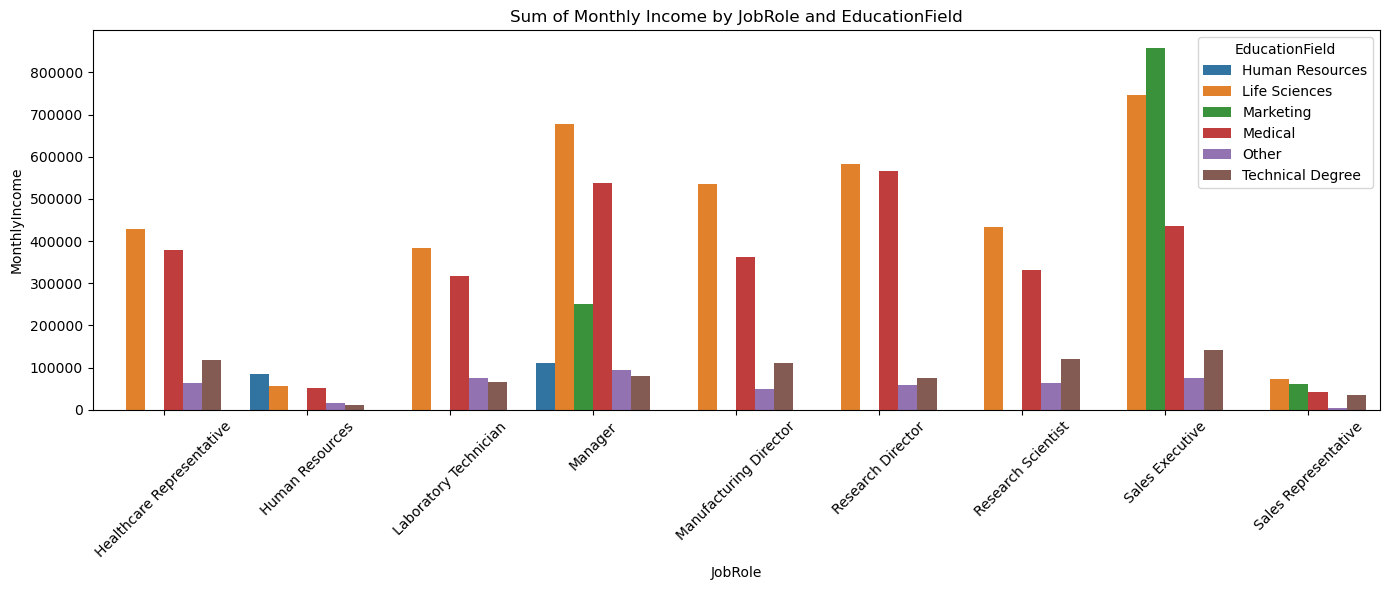

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.barplot(data=group_q1, x='JobRole', y='MonthlyIncome', hue='EducationField')
plt.title("Sum of Monthly Income by JobRole and EducationField")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


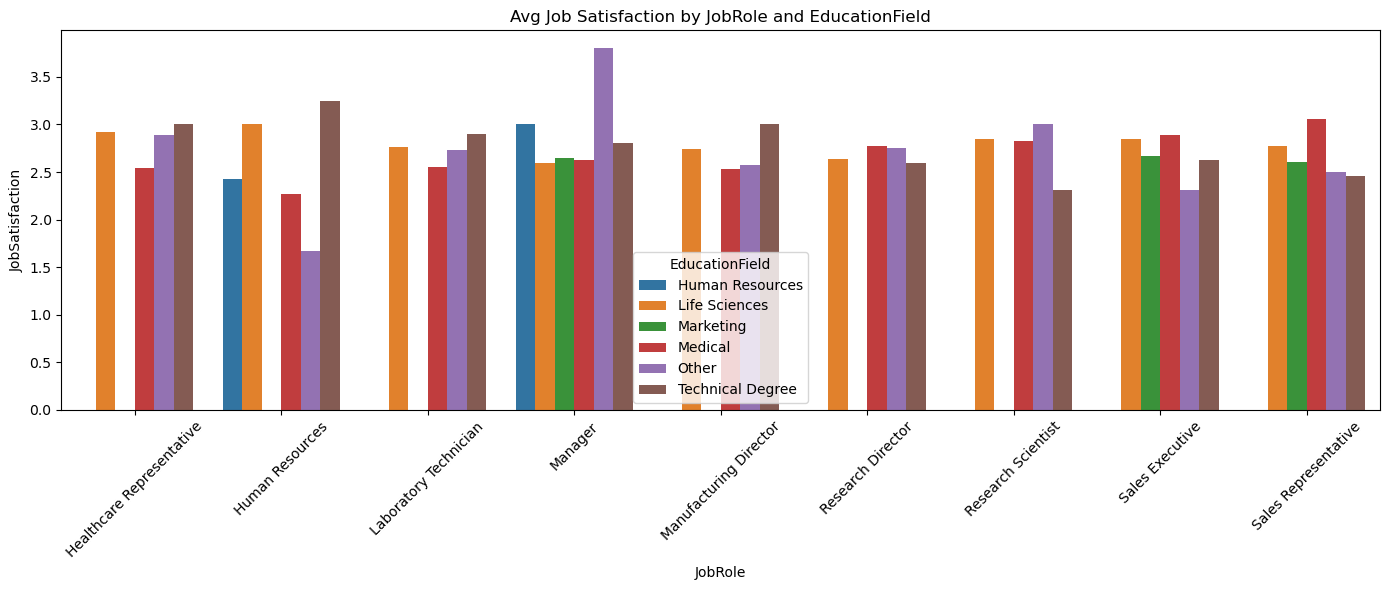

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.barplot(data=group_q1, x='JobRole', y='JobSatisfaction', hue='EducationField')
plt.title("Avg Job Satisfaction by JobRole and EducationField")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


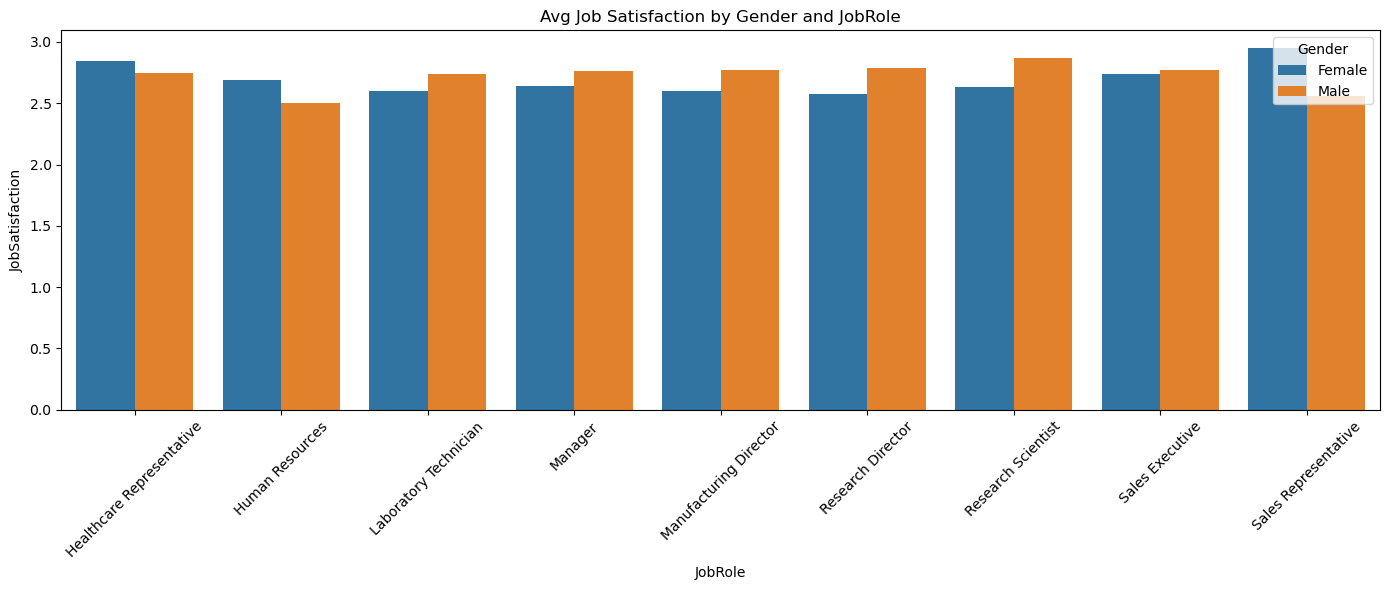

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.barplot(data=group_q2, x='JobRole', y='JobSatisfaction', hue='Gender')
plt.title("Avg Job Satisfaction by Gender and JobRole")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


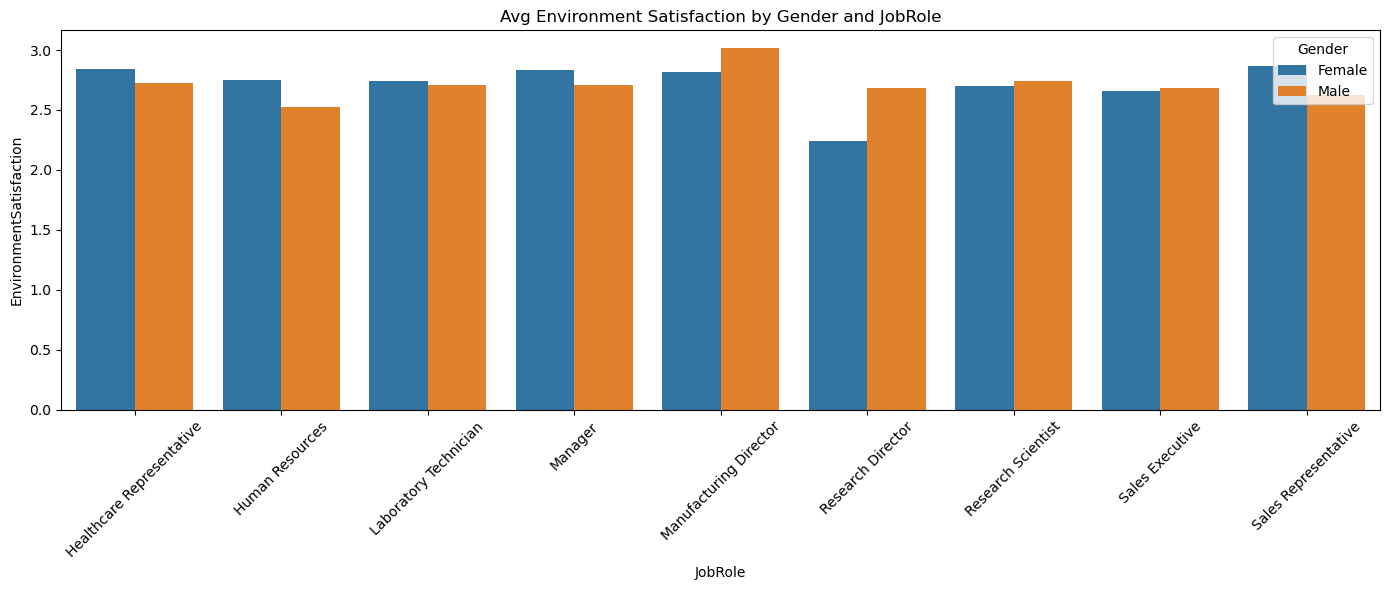

In [58]:
plt.figure(figsize=(14, 6))
sns.barplot(data=group_q2, x='JobRole', y='EnvironmentSatisfaction', hue='Gender')
plt.title("Avg Environment Satisfaction by Gender and JobRole")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


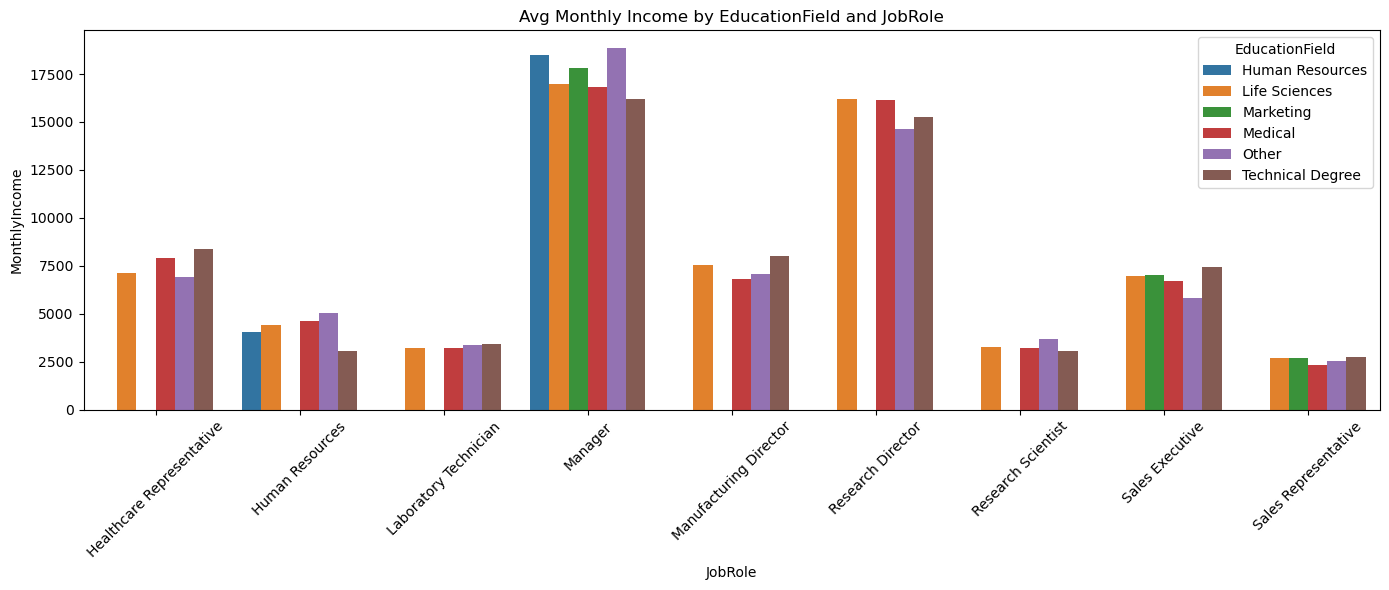

In [59]:
plt.figure(figsize=(14, 6))
sns.barplot(data=group_q3, x='JobRole', y='MonthlyIncome', hue='EducationField')
plt.title("Avg Monthly Income by EducationField and JobRole")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


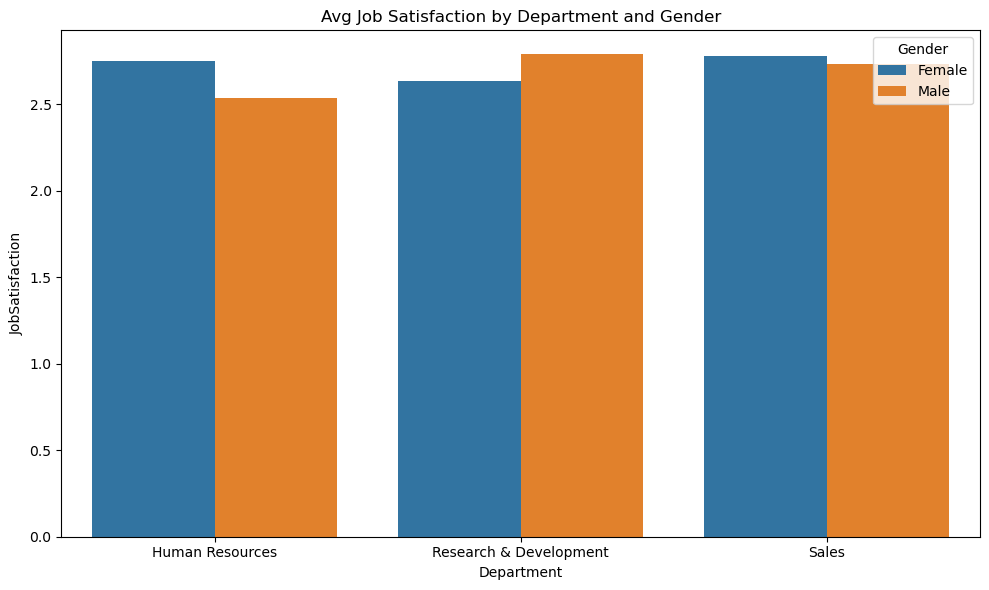

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(data=group_q4, x='Department', y='JobSatisfaction', hue='Gender')
plt.title("Avg Job Satisfaction by Department and Gender")
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_24384\3141581228.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_q5 = group_q5.pivot_table(index='JobRole', columns='Gender', values='DistanceFromHome')


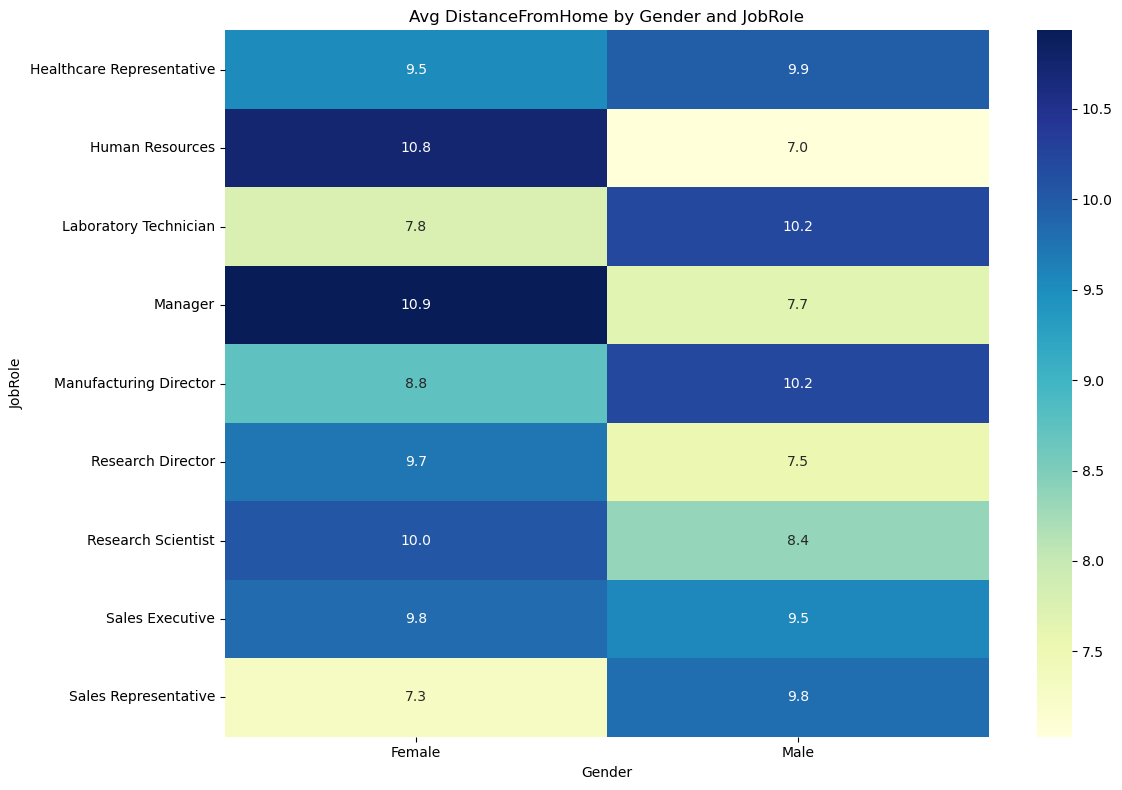

In [61]:
pivot_q5 = group_q5.pivot_table(index='JobRole', columns='Gender', values='DistanceFromHome')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_q5, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Avg DistanceFromHome by Gender and JobRole")
plt.tight_layout()
plt.show()


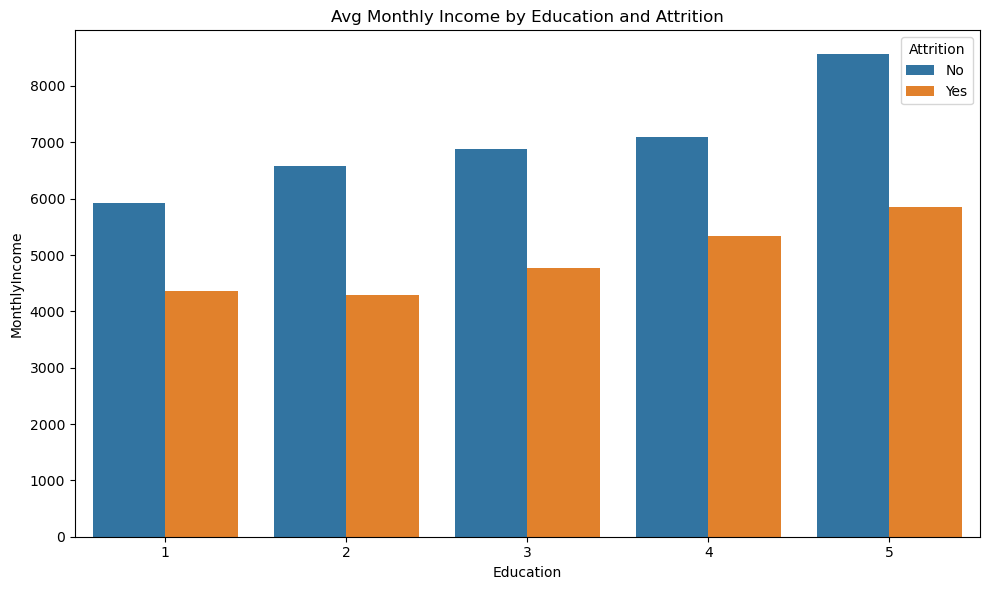

In [62]:
plt.figure(figsize=(10, 6))
sns.barplot(data=group_q6, x='Education', y='MonthlyIncome', hue='Attrition')
plt.title("Avg Monthly Income by Education and Attrition")
plt.tight_layout()
plt.show()


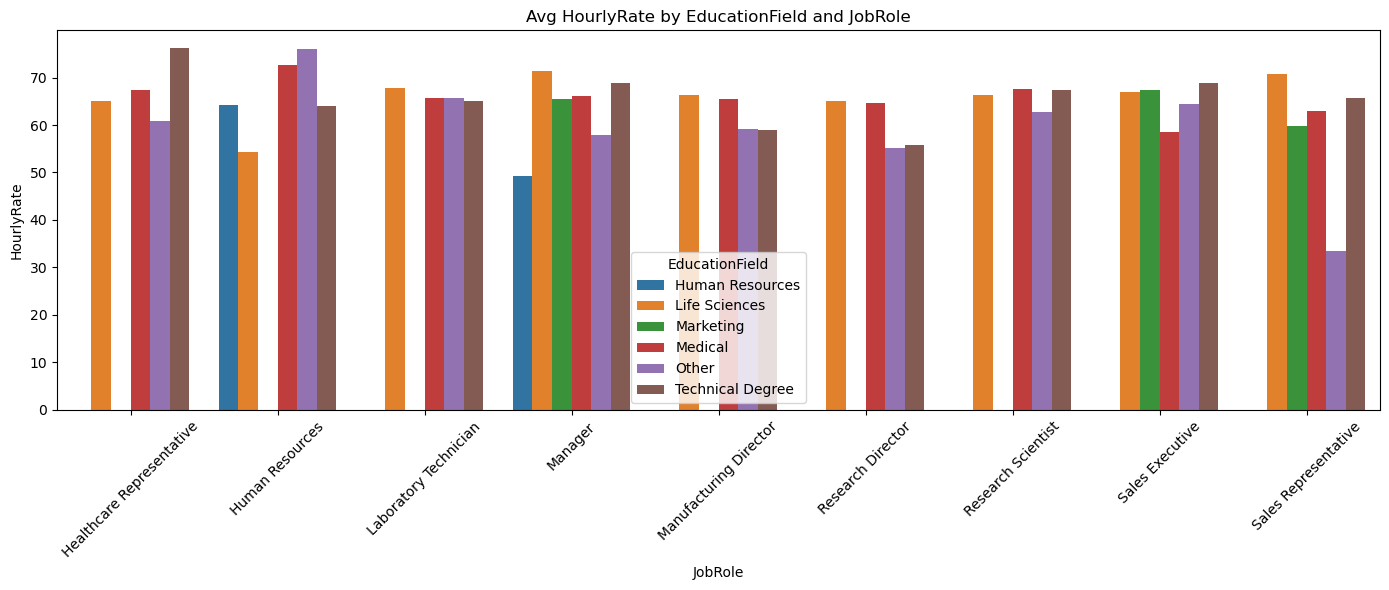

In [63]:
plt.figure(figsize=(14, 6))
sns.barplot(data=group_q3, x='JobRole', y='HourlyRate', hue='EducationField')
plt.title("Avg HourlyRate by EducationField and JobRole")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


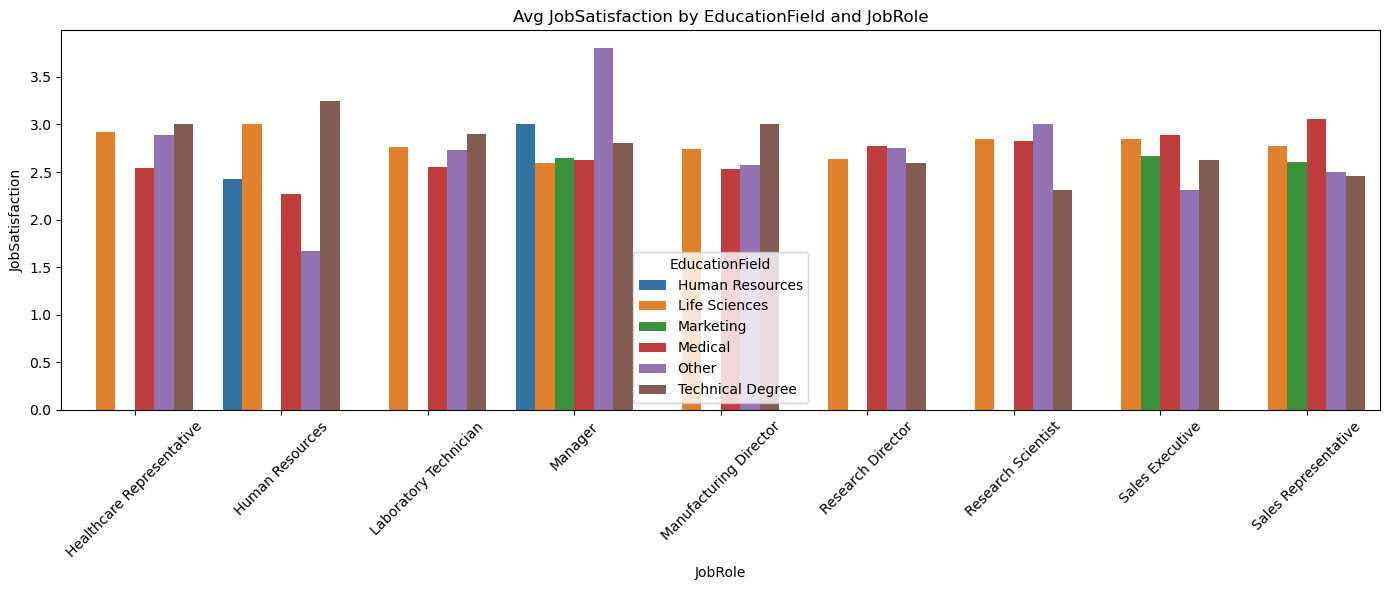

In [64]:
plt.figure(figsize=(14, 6))
sns.barplot(data=group_q3, x='JobRole', y='JobSatisfaction', hue='EducationField')
plt.title("Avg JobSatisfaction by EducationField and JobRole")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
